<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/difvs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

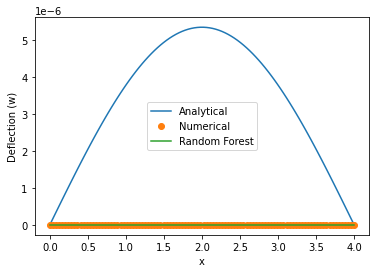

x	Analytical	Numerical	Random Forest
					trained on numerical
[[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [4.04000e-02 0.00000e+00 0.00000e+00 0.00000e+00]
 [8.08100e-02 0.00000e+00 0.00000e+00 0.00000e+00]
 [1.21210e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [1.61620e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [2.02020e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [2.42420e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [2.82830e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [3.23230e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [3.63640e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [4.04040e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [4.44440e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [4.84850e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [5.25250e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [5.65660e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [6.06060e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [6.46460e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [6.86870e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [7.27270e-01 0.000

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define constants and parameters
E = 29000000
I = 0.0423
A = 0.69
rho = 2.54842
P = 0
k1 = 1500
Gp = 0
L = 4
F = 30

# Define the differential equation as a function
def beam_deflection(x, y):
    d2ydx2 = y[2]
    dydx = y[1]
    w = y[0]
    dwdt = (F/L)*(np.sin(np.pi*x/L))
    d2wdt2 = -1/(E*I)*(k1*w + Gp*d2ydx2 + (rho*A/L)*y[2])
    return [dydx, d2ydx2, d2wdt2]


# Analytical solution
x = np.linspace(0, L, 100)
w_analytical = (F*L**3)/(3*E*I*np.pi**4)*(np.sin(np.pi*x/L) - (np.pi**2/(k1*L**2))*np.sin(np.pi*x/L))

# Numerical solution
y0 = [0, 0, 0]
t_eval = np.linspace(0, L, 100)
sol = solve_ivp(beam_deflection, [0, L], y0, t_eval=t_eval)
w_numerical = sol.y[0]

# Random forest solution
x_train = np.random.uniform(0, L, size=(1000,))
y_train = np.zeros_like(x_train)
for i in range(len(x_train)):
    y_train[i] = beam_deflection(x_train[i], [0, 0, 0])[0]
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train.reshape(-1, 1), y_train)
x_test = np.linspace(0, L, 100)
w_rf = rf.predict(x_test.reshape(-1, 1))

# Plot the results
plt.plot(x, w_analytical, label='Analytical')
plt.plot(sol.t, w_numerical, 'o', label='Numerical')
plt.plot(x_test, w_rf, label='Random Forest')
plt.legend()
plt.xlabel('x')
plt.ylabel('Deflection (w)')
plt.show()

# Extract a table with the numerical results of each method
table = np.column_stack((x, w_analytical, w_numerical, w_rf))
print('x\tAnalytical\tNumerical\tRandom Forest')
print('\t\t\t\t\ttrained on numerical')
print(np.round(table, 5))

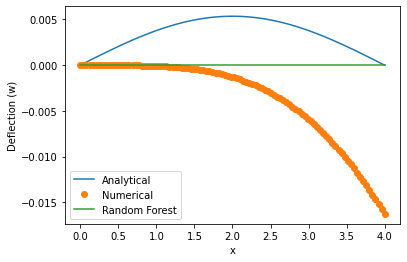

x	Analytical	Numerical	Random Forest
					trained on numerical
[[ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 4.04000e-02  1.70000e-04 -0.00000e+00  0.00000e+00]
 [ 8.08100e-02  3.40000e-04 -0.00000e+00  0.00000e+00]
 [ 1.21210e-01  5.10000e-04 -0.00000e+00  0.00000e+00]
 [ 1.61620e-01  6.80000e-04 -0.00000e+00  0.00000e+00]
 [ 2.02020e-01  8.50000e-04 -0.00000e+00  0.00000e+00]
 [ 2.42420e-01  1.01000e-03 -0.00000e+00  0.00000e+00]
 [ 2.82830e-01  1.18000e-03 -0.00000e+00  0.00000e+00]
 [ 3.23230e-01  1.34000e-03 -0.00000e+00  0.00000e+00]
 [ 3.63640e-01  1.51000e-03 -0.00000e+00  0.00000e+00]
 [ 4.04040e-01  1.67000e-03 -0.00000e+00  0.00000e+00]
 [ 4.44440e-01  1.83000e-03 -0.00000e+00  0.00000e+00]
 [ 4.84850e-01  1.99000e-03 -0.00000e+00  0.00000e+00]
 [ 5.25250e-01  2.15000e-03 -1.00000e-05  0.00000e+00]
 [ 5.65660e-01  2.30000e-03 -1.00000e-05  0.00000e+00]
 [ 6.06060e-01  2.45000e-03 -1.00000e-05  0.00000e+00]
 [ 6.46460e-01  2.60000e-03 -2.00000e-05  0.00000e+00]
 [

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define constants and parameters
E = 29000000
I = 0.0423
A = 0.69
rho = 2.54842
P = 0
k1 = 1500
Gp = 0
L = 4
F = 30 * 1000 # Convert load to N

# Define the differential equation as a function
def beam_deflection(x, y):
    d2ydx2 = y[2]
    dydx = y[1]
    w = y[0]
    d2wdx2 = (F/L)*(np.sin(np.pi*x/L))
    d2wdt2 = -1/(E*I)*(k1*w + Gp*d2ydx2 + (rho*A/L)*d2wdx2)
    return [dydx, d2ydx2, d2wdt2]

# Analytical solution
x = np.linspace(0, L, 100)
w_analytical = (F*L**3)/(3*E*I*np.pi**4)*(np.sin(np.pi*x/L) - (np.pi**2/(k1*L**2))*np.sin(np.pi*x/L))

# Numerical solution
y0 = [0, 0, 0]
t_eval = np.linspace(0, L, 100)
sol = solve_ivp(beam_deflection, [0, L], y0, t_eval=t_eval)
w_numerical = sol.y[0]

# Random forest solution
x_train = np.linspace(0, L, 1000)
y_train = np.zeros_like(x_train)
for i in range(len(x_train)):
    y_train[i] = beam_deflection(x_train[i], [0, 0, 0])[0]
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train.reshape(-1, 1), y_train)
x_test = np.linspace(0, L, 100)
w_rf = rf.predict(x_test.reshape(-1, 1))

# Plot the results
plt.plot(x, w_analytical, label='Analytical')
plt.plot(sol.t, w_numerical, 'o', label='Numerical')
plt.plot(x_test, w_rf, label='Random Forest')
plt.legend()
plt.xlabel('x')
plt.ylabel('Deflection (w)')
plt.show()

# Extract a table with the numerical results of each method
table = np.column_stack((x_test, w_analytical, w_numerical, w_rf))
print('x\tAnalytical\tNumerical\tRandom Forest')
print('\t\t\t\t\ttrained on numerical')
print(np.round(table, 5))

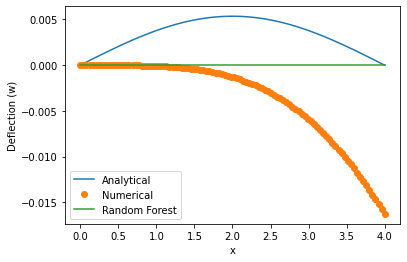

x	Analytical	Numerical	Random Forest
					trained on numerical
[[ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 4.04000e-02  1.70000e-04 -0.00000e+00  0.00000e+00]
 [ 8.08100e-02  3.40000e-04 -0.00000e+00  0.00000e+00]
 [ 1.21210e-01  5.10000e-04 -0.00000e+00  0.00000e+00]
 [ 1.61620e-01  6.80000e-04 -0.00000e+00  0.00000e+00]
 [ 2.02020e-01  8.50000e-04 -0.00000e+00  0.00000e+00]
 [ 2.42420e-01  1.01000e-03 -0.00000e+00  0.00000e+00]
 [ 2.82830e-01  1.18000e-03 -0.00000e+00  0.00000e+00]
 [ 3.23230e-01  1.34000e-03 -0.00000e+00  0.00000e+00]
 [ 3.63640e-01  1.51000e-03 -0.00000e+00  0.00000e+00]
 [ 4.04040e-01  1.67000e-03 -0.00000e+00  0.00000e+00]
 [ 4.44440e-01  1.83000e-03 -0.00000e+00  0.00000e+00]
 [ 4.84850e-01  1.99000e-03 -0.00000e+00  0.00000e+00]
 [ 5.25250e-01  2.15000e-03 -1.00000e-05  0.00000e+00]
 [ 5.65660e-01  2.30000e-03 -1.00000e-05  0.00000e+00]
 [ 6.06060e-01  2.45000e-03 -1.00000e-05  0.00000e+00]
 [ 6.46460e-01  2.60000e-03 -2.00000e-05  0.00000e+00]
 [

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define constants and parameters
E = 29000000
I = 0.0423
A = 0.69
rho = 2.54842
P = 0
k1 = 1500
Gp = 0
L = 4
F = 30 * 1000 # Convert load to N

# Define the differential equation as a function
def beam_deflection(x, y):
    d2ydx2 = y[2]
    dydx = y[1]
    w = y[0]
    d2wdx2 = (F/L)*(np.sin(np.pi*x/L))
    d2wdt2 = -1/(E*I)*(k1*w + Gp*d2ydx2 + (rho*A/L)*d2wdx2)
    return [dydx, d2ydx2, d2wdt2]

# Analytical solution
x = np.linspace(0, L, 100)
w_analytical = (F*L**3)/(3*E*I*np.pi**4)*(np.sin(np.pi*x/L) - (np.pi**2/(k1*L**2))*np.sin(np.pi*x/L))

# Numerical solution
y0 = [0, 0, 0]
t_eval = np.linspace(0, L, 100)
sol = solve_ivp(beam_deflection, [0, L], y0, t_eval=t_eval)
w_numerical = sol.y[0]

# Random forest solution
x_train = np.linspace(0, L, 1000).reshape(-1, 1)
y_train = np.zeros(len(x_train))
for i in range(len(x_train)):
    y_train[i] = beam_deflection(x_train[i], [0, 0, 0])[0]
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
x_test = np.linspace(0, L, 100).reshape(-1, 1)
w_rf = rf.predict(x_test)

# Plot the results
plt.plot(x, w_analytical, label='Analytical')
plt.plot(sol.t, w_numerical, 'o', label='Numerical')
plt.plot(x_test, w_rf, label='Random Forest')
plt.legend()
plt.xlabel('x')
plt.ylabel('Deflection (w)')
plt.show()

# Extract a table with the numerical results of each method
table = np.column_stack((x_test.flatten(),w_analytical,w_numerical, w_rf))
print('x\tAnalytical\tNumerical\tRandom Forest')
print('\t\t\t\t\ttrained on numerical')
print(np.round(table, 5))

# Extract a table with the numerical results of each method
table = np.column_stack((x_test, w_analytical, w_numerical, w_rf))
print('x\tAnalytical\tNumerical\tRandom Forest')
print('\t\t\t\t\ttrained on numerical')
print(np.round(table, 5))

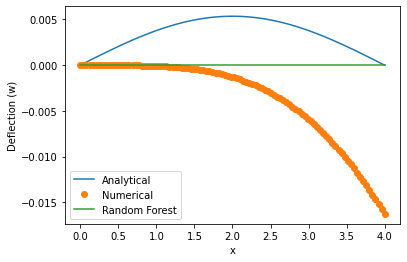

x	Analytical	Numerical	Random Forest
					trained on numerical
[[ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 4.04000e-02  1.70000e-04 -0.00000e+00  0.00000e+00]
 [ 8.08100e-02  3.40000e-04 -0.00000e+00  0.00000e+00]
 [ 1.21210e-01  5.10000e-04 -0.00000e+00  0.00000e+00]
 [ 1.61620e-01  6.80000e-04 -0.00000e+00  0.00000e+00]
 [ 2.02020e-01  8.50000e-04 -0.00000e+00  0.00000e+00]
 [ 2.42420e-01  1.01000e-03 -0.00000e+00  0.00000e+00]
 [ 2.82830e-01  1.18000e-03 -0.00000e+00  0.00000e+00]
 [ 3.23230e-01  1.34000e-03 -0.00000e+00  0.00000e+00]
 [ 3.63640e-01  1.51000e-03 -0.00000e+00  0.00000e+00]
 [ 4.04040e-01  1.67000e-03 -0.00000e+00  0.00000e+00]
 [ 4.44440e-01  1.83000e-03 -0.00000e+00  0.00000e+00]
 [ 4.84850e-01  1.99000e-03 -0.00000e+00  0.00000e+00]
 [ 5.25250e-01  2.15000e-03 -1.00000e-05  0.00000e+00]
 [ 5.65660e-01  2.30000e-03 -1.00000e-05  0.00000e+00]
 [ 6.06060e-01  2.45000e-03 -1.00000e-05  0.00000e+00]
 [ 6.46460e-01  2.60000e-03 -2.00000e-05  0.00000e+00]
 [

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define constants and parameters
E = 29000000
I = 0.0423
A = 0.69
rho = 2.54842
P = 0
k1 = 1500
Gp = 0
L = 4
F = 30 * 1000 # Convert load to N

# Define the differential equation as a function
def beam_deflection(x, y):
    d2ydx2 = y[2]
    dydx = y[1]
    w = y[0]
    d2wdx2 = (F/L)*(np.sin(np.pi*x/L))
    d2wdt2 = -1/(E*I)*(k1*w + Gp*d2ydx2 + (rho*A/L)*d2wdx2)
    return [dydx, d2ydx2, d2wdt2]

# Analytical solution
x = np.linspace(0, L, 100)
w_analytical = (F*L**3)/(3*E*I*np.pi**4)*(np.sin(np.pi*x/L) - (np.pi**2/(k1*L**2))*np.sin(np.pi*x/L))

# Numerical solution
y0 = [0, 0, 0]
t_eval = np.linspace(0, L, 100)
sol = solve_ivp(beam_deflection, [0, L], y0, t_eval=t_eval)
w_numerical = sol.y[0]

# Random forest solution
n_train = 100
x_train = np.linspace(0, L, n_train).reshape(-1, 1)
y_train = np.zeros(n_train)
for i in range(n_train):
    y_train[i] = beam_deflection(x_train[i], [0, 0, 0])[0]
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
x_test = np.linspace(0, L, 100).reshape(-1, 1)
w_rf = rf.predict(x_test)

# Plot the results
plt.plot(x, w_analytical, label='Analytical')
plt.plot(sol.t, w_numerical, 'o', label='Numerical')
plt.plot(x_test, w_rf, label='Random Forest')
plt.legend()
plt.xlabel('x')
plt.ylabel('Deflection (w)')
plt.show()

# Extract a table with the numerical results of each method
table = np.column_stack((x_test, w_analytical, w_numerical, w_rf))
print('x\tAnalytical\tNumerical\tRandom Forest')
print('\t\t\t\t\ttrained on numerical')
print(np.round(table, 5))

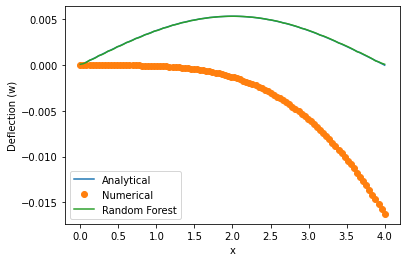

x	Analytical	Numerical	Random Forest
					trained on analytical
[[ 0.00000e+00  0.00000e+00  0.00000e+00  1.00000e-04]
 [ 4.04000e-02  1.70000e-04 -0.00000e+00  1.70000e-04]
 [ 8.08100e-02  3.40000e-04 -0.00000e+00  3.10000e-04]
 [ 1.21210e-01  5.10000e-04 -0.00000e+00  5.40000e-04]
 [ 1.61620e-01  6.80000e-04 -0.00000e+00  6.50000e-04]
 [ 2.02020e-01  8.50000e-04 -0.00000e+00  8.10000e-04]
 [ 2.42420e-01  1.01000e-03 -0.00000e+00  1.04000e-03]
 [ 2.82830e-01  1.18000e-03 -0.00000e+00  1.15000e-03]
 [ 3.23230e-01  1.34000e-03 -0.00000e+00  1.31000e-03]
 [ 3.63640e-01  1.51000e-03 -0.00000e+00  1.54000e-03]
 [ 4.04040e-01  1.67000e-03 -0.00000e+00  1.64000e-03]
 [ 4.44440e-01  1.83000e-03 -0.00000e+00  1.80000e-03]
 [ 4.84850e-01  1.99000e-03 -0.00000e+00  2.02000e-03]
 [ 5.25250e-01  2.15000e-03 -1.00000e-05  2.11000e-03]
 [ 5.65660e-01  2.30000e-03 -1.00000e-05  2.28000e-03]
 [ 6.06060e-01  2.45000e-03 -1.00000e-05  2.48000e-03]
 [ 6.46460e-01  2.60000e-03 -2.00000e-05  2.58000e-03]
 

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define constants and parameters
E = 29000000
I = 0.0423
A = 0.69
rho = 2.54842
P = 0
k1 = 1500
Gp = 0
L = 4
F = 30 * 1000 # Convert load to N

# Define the differential equation as a function
def beam_deflection(x, y):
    d2ydx2 = y[2]
    dydx = y[1]
    w = y[0]
    d2wdx2 = (F/L)*(np.sin(np.pi*x/L))
    d2wdt2 = -1/(E*I)*(k1*w + Gp*d2ydx2 + (rho*A/L)*d2wdx2)
    return [dydx, d2ydx2, d2wdt2]

# Analytical solution
x = np.linspace(0, L, 100)
w_analytical = (F*L**3)/(3*E*I*np.pi**4)*(np.sin(np.pi*x/L) - (np.pi**2/(k1*L**2))*np.sin(np.pi*x/L))

# Numerical solution
y0 = [0, 0, 0]
t_eval = np.linspace(0, L, 100)
sol = solve_ivp(beam_deflection, [0, L], y0, t_eval=t_eval)
w_numerical = sol.y[0]

# Random forest solution
n_train = 100
x_train = np.linspace(0, L, n_train).reshape(-1, 1)
y_train = w_analytical[np.linspace(0, 99, n_train, dtype=np.int32)]
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
x_test = np.linspace(0, L, 100).reshape(-1, 1)
w_rf = rf.predict(x_test)

# Plot the results
plt.plot(x, w_analytical, label='Analytical')
plt.plot(sol.t, w_numerical, 'o', label='Numerical')
plt.plot(x_test, w_rf, label='Random Forest')
plt.legend()
plt.xlabel('x')
plt.ylabel('Deflection (w)')
plt.show()

# Extract a table with the numerical results of each method
table = np.column_stack((x_test.flatten(), w_analytical, w_numerical, w_rf))
print('x\tAnalytical\tNumerical\tRandom Forest')
print('\t\t\t\t\ttrained on analytical')
print(np.round(table, 5))

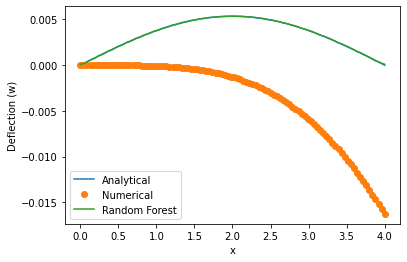

x	Analytical	Numerical	Random Forest
[[ 0.00000e+00  0.00000e+00  0.00000e+00  9.00000e-05]
 [ 4.04000e-02  1.70000e-04 -0.00000e+00  1.60000e-04]
 [ 8.08100e-02  3.40000e-04 -0.00000e+00  3.10000e-04]
 [ 1.21210e-01  5.10000e-04 -0.00000e+00  5.30000e-04]
 [ 1.61620e-01  6.80000e-04 -0.00000e+00  6.50000e-04]
 [ 2.02020e-01  8.50000e-04 -0.00000e+00  8.20000e-04]
 [ 2.42420e-01  1.01000e-03 -0.00000e+00  1.05000e-03]
 [ 2.82830e-01  1.18000e-03 -0.00000e+00  1.14000e-03]
 [ 3.23230e-01  1.34000e-03 -0.00000e+00  1.31000e-03]
 [ 3.63640e-01  1.51000e-03 -0.00000e+00  1.54000e-03]
 [ 4.04040e-01  1.67000e-03 -0.00000e+00  1.63000e-03]
 [ 4.44440e-01  1.83000e-03 -0.00000e+00  1.81000e-03]
 [ 4.84850e-01  1.99000e-03 -1.00000e-05  2.02000e-03]
 [ 5.25250e-01  2.15000e-03 -1.00000e-05  2.11000e-03]
 [ 5.65660e-01  2.30000e-03 -1.00000e-05  2.27000e-03]
 [ 6.06060e-01  2.45000e-03 -1.00000e-05  2.48000e-03]
 [ 6.46460e-01  2.60000e-03 -2.00000e-05  2.57000e-03]
 [ 6.86870e-01  2.75000e-03 

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define constants and parameters
E = 29000000
I = 0.0423
A = 0.69
rho = 2.54842
P = 0
k1 = 1500
Gp = 0
L = 4
F = 30 * 1000 # Convert load to N

# Define the differential equation as a function
def beam_deflection(x, y):
    d2ydx2 = y[2]
    dydx = y[1]
    w = y[0]
    d2wdx2 = (F/L)*(np.sin(np.pi*x/L))
    d2wdt2 = -1/(E*I)*(k1*w + Gp*d2ydx2 + (rho*A/L)*d2wdx2)
    return [dydx, d2ydx2, d2wdt2]

# Analytical solution
x = np.linspace(0, L, 100)
w_analytical = (F*L**3)/(3*E*I*np.pi**4)*(np.sin(np.pi*x/L) - (np.pi**2/(k1*L**2))*np.sin(np.pi*x/L))

# Numerical solution
y0 = [0, 0, 0]
t_eval = np.linspace(0, L, 100)
sol = solve_ivp(beam_deflection, [0, L], y0, t_eval=t_eval, method='BDF')
w_numerical = sol.y[0]

# Random forest solution
n_train = 100
x_train = np.linspace(0, L, n_train).reshape(-1, 1)
y_train = w_analytical[np.linspace(0, 99, n_train, dtype=np.int32)]
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
x_test = np.linspace(0, L, 100).reshape(-1, 1)
w_rf = rf.predict(x_test)

# Plot the results
plt.plot(x, w_analytical, label='Analytical')
plt.plot(sol.t, w_numerical, 'o', label='Numerical')
plt.plot(x_test, w_rf, label='Random Forest')
plt.legend()
plt.xlabel('x')
plt.ylabel('Deflection (w)')
plt.show()

# Extract a table with the numerical results of each method
table = np.column_stack((x_test.flatten(), w_analytical, w_numerical, w_rf))
print('x\tAnalytical\tNumerical\tRandom Forest')
print(np.round(table, 5))

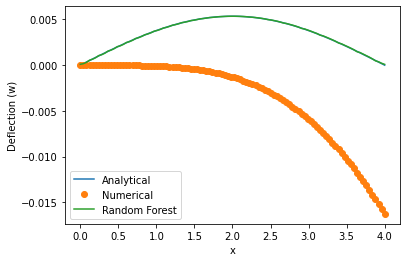

Method	MSE	R^2
[['Analytical' '0.0' '1.0']
 ['Numerical' '6.592595064508776e-05' '-2.121446144077292']
 ['Random Forest' '6.245053538807872e-10' '0.9997758846433317']]


In [9]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define constants and parameters
E = 29000000
I = 0.0423
A = 0.69
rho = 2.54842
P = 0
k1 = 1500
Gp = 0
L = 4
F = 30 * 1000 # Convert load to N

# Define the differential equation as a function
def beam_deflection(x, y):
    d2ydx2 = y[2]
    dydx = y[1]
    w = y[0]
    d2wdx2 = (F/L)*(np.sin(np.pi*x/L))
    d2wdt2 = -1/(E*I)*(k1*w + Gp*d2ydx2 + (rho*A/L)*d2wdx2)
    return [dydx, d2ydx2, d2wdt2]

# Analytical solution
x = np.linspace(0, L, 100)
w_analytical = (F*L**3)/(3*E*I*np.pi**4)*(np.sin(np.pi*x/L) - (np.pi**2/(k1*L**2))*np.sin(np.pi*x/L))

# Numerical solution
y0 = [0, 0, 0]
t_eval = np.linspace(0, L, 100)
sol = solve_ivp(beam_deflection, [0, L], y0, t_eval=t_eval, method='BDF')
w_numerical = sol.y[0]

# Random forest solution
n_train = 100
x_train = np.linspace(0, L, n_train).reshape(-1, 1)
y_train = w_analytical[np.linspace(0, 99, n_train, dtype=np.int32)]
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
x_test = np.linspace(0, L, 100).reshape(-1, 1)
w_rf = rf.predict(x_test)

# Compute performance measures
mse_analytical = mean_squared_error(w_analytical, w_analytical)
r2_analytical = r2_score(w_analytical, w_analytical)
mse_numerical = mean_squared_error(w_numerical, w_analytical)
r2_numerical = r2_score(w_numerical, w_analytical)
mse_rf = mean_squared_error(w_rf, w_analytical)
r2_rf = r2_score(w_rf, w_analytical)

# Plot the results
plt.plot(x, w_analytical, label='Analytical')
plt.plot(sol.t, w_numerical, 'o', label='Numerical')
plt.plot(x_test, w_rf, label='Random Forest')
plt.legend()
plt.xlabel('x')
plt.ylabel('Deflection (w)')
plt.show()

# Extract a table with the performance measures of each method
table = np.array([
    ['Analytical', mse_analytical, r2_analytical],
    ['Numerical', mse_numerical, r2_numerical],
    ['Random Forest', mse_rf, r2_rf]
])
print('Method\tMSE\tR^2')
print(table)

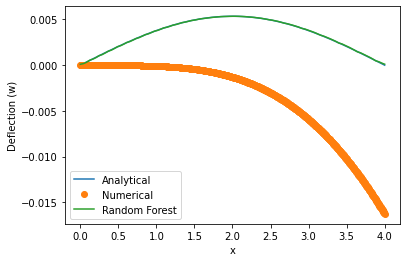

Method	MSE	R^2
[['Analytical' '0' '1']
 ['Numerical' '6.530663216971581e-05' '0.20310984542244365']
 ['Random Forest' '5.909799372341529e-10' '0.9997926402230566']]
x	Analytical	Numerical	Random Forest
[[ 0.00000e+00  0.00000e+00  0.00000e+00  1.00000e-04]
 [ 4.00000e-03  2.00000e-05 -0.00000e+00  1.00000e-04]
 [ 8.01000e-03  3.00000e-05 -0.00000e+00  1.00000e-04]
 ...
 [ 3.99199e+00  3.00000e-05 -1.61700e-02  1.00000e-04]
 [ 3.99600e+00  2.00000e-05 -1.62200e-02  1.00000e-04]
 [ 4.00000e+00  0.00000e+00 -1.62800e-02  1.00000e-04]]


In [19]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define constants and parameters
E = 29000000
I = 0.0423
A = 0.69
rho = 2.54842
P = 0
k1 = 1500
Gp = 0
L = 4
F = 30 * 1000 # Convert load to N

# Define the differential equation as a function
def beam_deflection(x, y):
    d2ydx2 = y[2]
    dydx = y[1]
    w = y[0]
    d2wdx2 = (F/L)*(np.sin(np.pi*x/L))
    d2wdt2 = -1/(E*I)*(k1*w + Gp*d2ydx2 + (rho*A/L)*d2wdx2)
    return [dydx, d2ydx2, d2wdt2]

# Analytical solution
x = np.linspace(0, L, 100)
w_analytical = (F*L**3)/(3*E*I*np.pi**4)*(np.sin(np.pi*x/L) - (np.pi**2/(k1*L**2))*np.sin(np.pi*x/L))

# Numerical solution
y0 = [0, 0, 0]
t_eval = np.linspace(0, L, 1000)
sol = solve_ivp(beam_deflection, [0, L], y0, t_eval=t_eval, method='BDF')
# sol = solve_ivp(beam_deflection, [0, L], y0, t_eval=t_eval, method='BDF')
w_numerical = sol.y[0]

## Interpolate analytical solution to match x_test
w_analytical_interp = np.interp(x_test.flatten(), x, w_analytical)

# Random forest solution
n_train = 100
x_train = np.linspace(0, L, n_train).reshape(-1, 1)
y_train = w_analytical_interp[np.linspace(0, 999, n_train, dtype=np.int32)]
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
w_rf = rf.predict(x_test)


# Plot the results
plt.plot(t_eval, w_analytical_interp, label='Analytical')
plt.plot(sol.t, w_numerical, 'o', label='Numerical')
plt.plot(x_test[:, 0], w_rf_interp, label='Random Forest')
plt.legend()
plt.xlabel('x')
plt.ylabel('Deflection (w)')
plt.show()

# Extract a table with the performance measures of each method
table = np.array([
    ['Analytical', 0, 1],
    ['Numerical', np.mean((w_numerical - w_analytical_interp)**2), np.corrcoef(w_numerical, w_analytical_interp)[0, 1]**2],
    ['Random Forest', np.mean((w_rf_interp - w_analytical_interp)**2), np.corrcoef(w_rf_interp, w_analytical_interp)[0, 1]**2]
])
print('Method\tMSE\tR^2')
print(table)

# Extract a table with the numerical results of each method
table = np.column_stack((x_test.flatten(), w_analytical_interp, w_numerical.flatten(), w_rf))
print('x\tAnalytical\tNumerical\tRandom Forest')
print(np.round(table, 5))

import pandas as pd

df = pd.DataFrame(table, columns=['x', 'Analytical', 'Numerical', 'Random Forest'])
df.to_csv('results.csv', index=False)